# Roomba Vacuums - Text Analytics

For this analysis I will breakdown customer's reviews for the famous self operating robot vacumms by [iRobot](https://www.irobot.com/roomba?gclid=CjwKCAiA6vXwBRBKEiwAYE7iSzVrllMR9lvWM5JJ2Nj_dMHJbhYwYHuSgomDY8sv4hqfjr3eFDnD6hoCFK8QAvD_BwE&gclsrc=aw.ds).

Column names include:
1. Date - the date the review was left for the product.
2. Product - which model the review is being left for.
3. Stars - what was the rating given for the review out of 5.
4. Review - the full review left by the customer on a single product.

In [1]:
library(tidyverse)
library(tidytext)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

### Importing Data

In [2]:
review_data <- read_csv("Roomba Reviews.csv")
head(review_data)

Parsed with column specification:
cols(
  Date = col_character(),
  Product = col_character(),
  Stars = col_double(),
  Title = col_character(),
  Review = col_character()
)


Date,Product,Stars,Title,Review
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,You would not believe how well this works
1/12/15,iRobot Roomba 650 for Pets,4,Four Stars,You just walk away and it does the rest
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,You have to Roomba proof your house but once that is done it is awesome. It's like having a pet that cleans.
8/4/13,iRobot Roomba 650 for Pets,3,Love-hate this vaccuum,"Yes, it's a fascinating, albeit expensive, bit of technology. That said, it is a pain in the butt to clean - every time, if you have the model for pets. Cat hair will clog it in one small room. On the plus side, it gets under the bed, where there could be more pet hair than I care to admit. Can two short haired cats shed faster than Roomba can clean? Will my patience wear out, before my picks, and tweezers and screwdriver? Stay tuned..."
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,"Years ago I bought one of the original Roomba's and was underwhelmed - it was slow and got stuck in corners. But I'm lazy at heart, so decided to try again - and this model is amazing!! First - no problem in corners - it spins and backs out. (It also has a spinning brush on the side which whisks all those dust devils out of the corner into the vacuum). Also, it goes easily from carpet to hardwood floor to doormat and back. If it encounters a cord on the floor, it backs up and comes back in from another angle. And I know it's weird to think about - how the heck does it figure out your floor plan, especially when it seems to go in random directions? It all gets down to math, my friends, and the engineers at Roomba worked it out. We use it for individual rooms (like our muddy utility room), and for entire house runs. It's great if you have a dog (you wouldn't believe how much dog hair is under your couch). Easy to clean, easy to set up and definately easy to use. (You push a button and walk away!) Great buy."
12/27/15,iRobot Roomba 650 for Pets,5,Wow!,"Wow.Wow. I never knew my floors were so dirty before this! I've set my ""Room by"" to clean every day. I am astounded each day when I empty the bin. Where did all this come from?? I have 3 small dogs and can't believe I've spent years living in what I would now consider gross based on what I dump out each day. I haven't had to vacuum in weeks! I am going to get this for my 70+ parents. Best invention ever!!!"


### Exploration

In [3]:
# mean star rating of iRobot Roomba 650 for Pets
review_data %>%
  filter(Product == "iRobot Roomba 650 for Pets") %>%
  summarize(stars_mean = mean(Stars))

stars_mean
4.488152


In [4]:
#average star rating by product name
review_data %>%
  group_by(Product) %>%
  summarize(stars_mean = mean(Stars))

Product,stars_mean
iRobot Roomba 650 for Pets,4.488152
iRobot Roomba 880 for Pets and Allergies,4.423333


In [5]:
#Count number of rows
review_data %>%
  summarize(number_rows= n())

number_rows
1833


In [6]:
#Count for product
review_data %>%
  count(Product) %>%
  arrange(desc(n))

Product,n
iRobot Roomba 880 for Pets and Allergies,1200
iRobot Roomba 650 for Pets,633


### Tokenizing

In [7]:
#tokenize words into individual rows
tidy_review <- review_data %>%
  unnest_tokens(word, Review)
head(tidy_review)

Date,Product,Stars,Title,word
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,you
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,would
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,not
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,believe
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,how
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,well


We now have each word in a single word per row. Total number of rows have significantly increased. Whitespace is also removed.

In [8]:
# Count words
tidy_review %>%
  count(word) %>%
  arrange(desc(n))

head(tidy_review)

word,n
the,11785
it,7905
and,6794
to,6440
i,6034
a,5884
is,3347
of,3229
have,2470
that,2410


Date,Product,Stars,Title,word
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,you
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,would
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,not
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,believe
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,how
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,well


The most common words are stop words and are not useful for a analysis.

#### Anti join

In [9]:
# using anti join on reviews
tidy_review2 <- review_data %>%
  unnest_tokens(word, Review) %>%
  anti_join(stop_words)

head(tidy_review2)

Joining, by = "word"

Date,Product,Stars,Title,word
1/12/15,iRobot Roomba 650 for Pets,4,Four Stars,walk
1/12/15,iRobot Roomba 650 for Pets,4,Four Stars,rest
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,roomba
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,proof
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,house
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,awesome


In [10]:
#sort in descending order
tidy_review2 %>%
    count(word) %>%
    arrange(desc(n))

head(tidy_review2)

word,n
roomba,2286
clean,1204
vacuum,989
hair,900
cleaning,809
time,795
house,745
floors,657
day,578
floor,561


Date,Product,Stars,Title,word
1/12/15,iRobot Roomba 650 for Pets,4,Four Stars,walk
1/12/15,iRobot Roomba 650 for Pets,4,Four Stars,rest
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,roomba
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,proof
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,house
12/26/13,iRobot Roomba 650 for Pets,5,Awesome love it.,awesome


We can see that the main words used which were not stop words were roomba, clean, vacuum, hair, and cleaning.

### Sentiment dictionaries

The 4 dictionaries avaible in R are:
    
    1. Bing - In the bing dictionary words are tagged with either positive or negative.    
    2. Afinn -In Afinn dictionary words are tagged on a scale of -5 to 5.
    3. loughran - 
    4. nrc - 
    
#### Bing dictionary

In [11]:
#bing dictionary breakdown
head(get_sentiments("bing"))

word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


In [12]:
#count of sentiments in Bing dictionary
sentiment_counts <- get_sentiments("bing") %>%
    count(sentiment)
sentiment_counts

sentiment,n
negative,4781
positive,2005


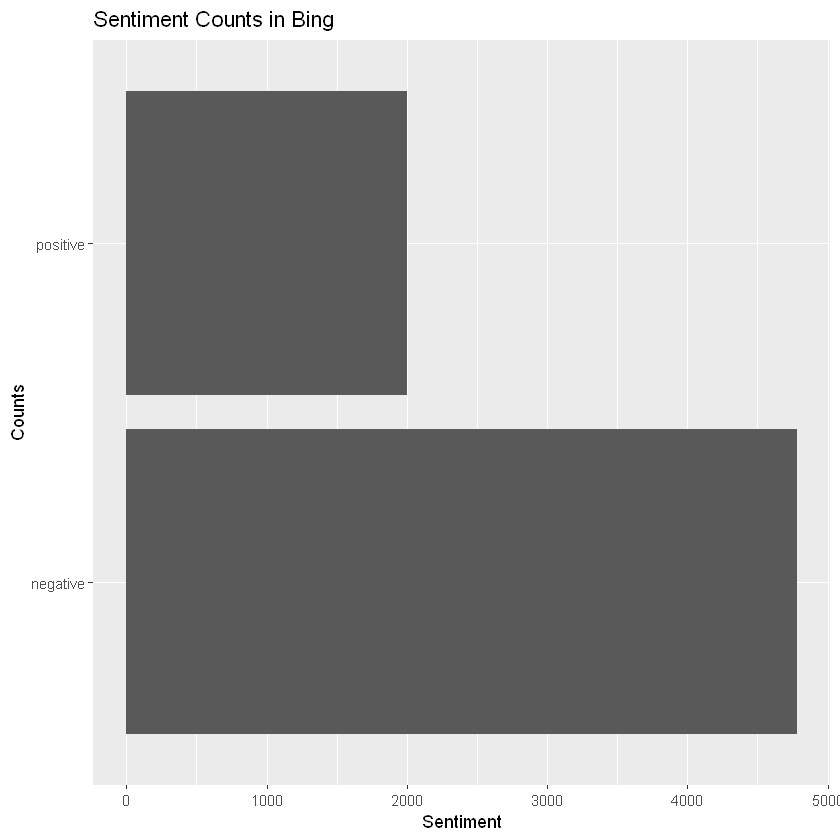

In [13]:
ggplot(sentiment_counts, aes(x = sentiment, y = n))+
    geom_col()+
    coord_flip() +
    labs(
        title = "Sentiment Counts in Bing",
        x = "Counts",
        y = "Sentiment")

It is pretty clear that negative comments were signifcantly more than positive based on the bing dictionary.

#### Afinn

In [14]:
head(get_sentiments("afinn"))

word,value
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


In [15]:
#scale of sentiments in affin dictionary
sentiment_counts <- get_sentiments("afinn") %>%
summarise(    
    min = min(value),
    max = max(value)
    )
sentiment_counts

min,max
-5,5


We can see for the afinn dictionary uses a scale of -5 to 5 to rate the sentiment.

#### Loughran

In [16]:
head(get_sentiments("loughran"))

word,sentiment
abandon,negative
abandoned,negative
abandoning,negative
abandonment,negative
abandonments,negative
abandons,negative


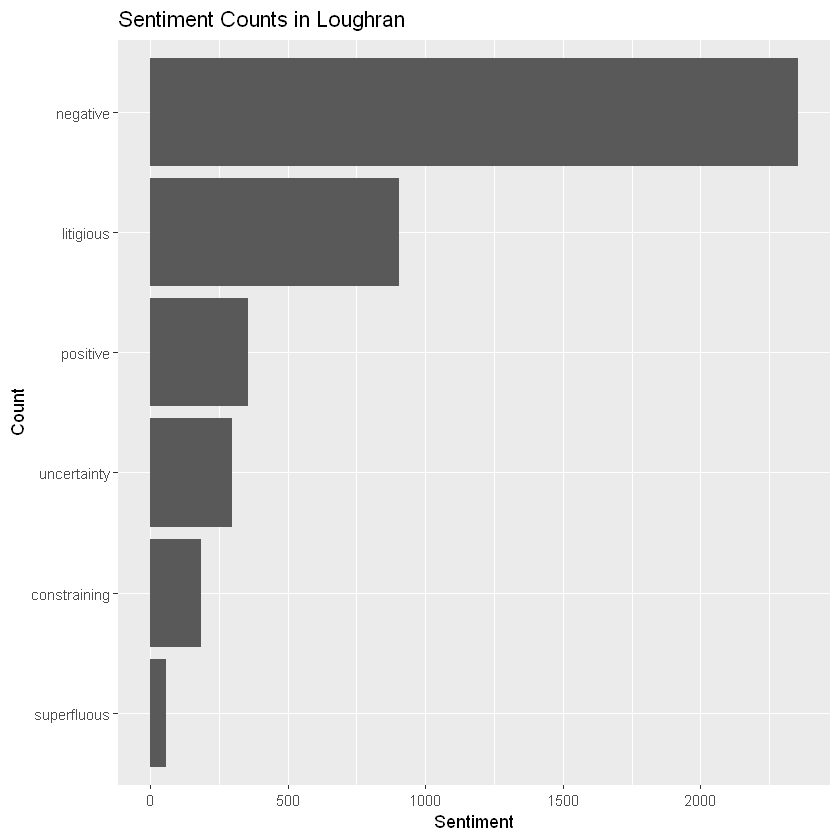

In [17]:
# plot loughran
sentiment_counts <- get_sentiments("loughran") %>%
    count(sentiment) %>%
    mutate(sentiment2 = fct_reorder( sentiment, n))

ggplot(sentiment_counts, aes(x = sentiment2, y = n)) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Sentiment Counts in Loughran",
        x = "Count",
        y = "Sentiment"
    )

We can see that there are significantly more negative reviews.

In [18]:
head(get_sentiments("nrc"))

word,sentiment
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear


### Appending Dictionary

In [19]:
tidy_review %>%
    inner_join(get_sentiments("loughran"))

Joining, by = "word"

Date,Product,Stars,Title,word,sentiment
2/28/15,iRobot Roomba 650 for Pets,5,Five Stars,believe,uncertainty
8/4/13,iRobot Roomba 650 for Pets,3,Love-hate this vaccuum,could,uncertainty
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,slow,negative
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,problem,negative
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,easily,positive
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,seems,uncertainty
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,random,uncertainty
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,great,positive
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,believe,uncertainty
12/22/15,iRobot Roomba 650 for Pets,5,This vacuum is fantastic!!,easy,positive


We can see that the number of rows have been drastically reduced, since we have words that have matching words in the sentiment dictionary as retained. We only know the sentiment of the words in our data that are also in the dictionary we're using; thus our sentitment analysis is conditioned on the dictionary we use.

In [20]:
# count sentiment

sentiment_review <- tidy_review %>%
    inner_join(get_sentiments("loughran"))

sentiment_review %>%
    count(sentiment)

Joining, by = "word"

sentiment,n
constraining,170
litigious,81
negative,2157
positive,3276
superfluous,3
uncertainty,1676


We can see that the reviews on aggregate are eaully positive and negative using the sentiment dictionary.

In [21]:
sentiment_review %>%
    count(word, sentiment) %>%
    arrange(desc(n))

word,sentiment,n
great,positive,585
good,positive,426
better,positive,313
easy,positive,297
could,uncertainty,258
best,positive,239
problem,negative,192
seems,uncertainty,178
may,uncertainty,139
sometimes,uncertainty,135


This gives us an idead by both word and sentiment to find what words are used more often for each sentiment. The key words for highest frequency are:
    
    1. great
    2. good
    3. better
    4. easy
    5. could

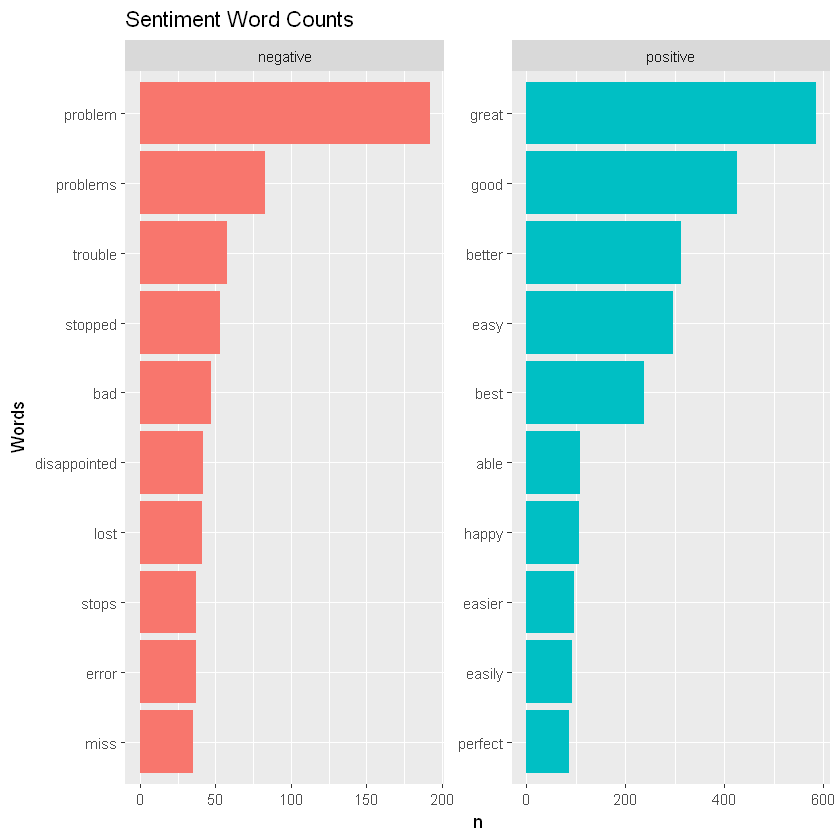

In [22]:
#top 10 positive and negative words in order

sentiment_review2 <- sentiment_review %>%
    filter(sentiment %in% c("positive", "negative"))

word_counts <- sentiment_review2 %>%
    count(word, sentiment) %>%
    group_by(sentiment) %>%
    top_n(10, n) %>%
    ungroup() %>%
    mutate(
        word2 = fct_reorder(word, n)
    )


ggplot(word_counts,  aes(x = word2, y = n, fill = sentiment)) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~sentiment, scales = "free") +
    coord_flip() +
    labs(
        title = "Sentiment Word Counts",
        x = "Words"
    )

### Document term matrices

In [34]:
dtm_review <- tidy_review %>%
    count(word, Product) %>%
    cast_dtm(Product, word, n) %>%
    as.matrix()

head(dtm_review)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,______________________________________________________________________first,0.3,0.5,0_0,00,00am,00pm,01,02,09,...,zips,zombie,zone,zones,zoo,zoom,zooms,zumba,zyrtec,NA
iRobot Roomba 650 for Pets,1,0,1,1,2,1,2,1,1,1,...,1,1,0,1,0,1,0,1,0,1
iRobot Roomba 880 for Pets and Allergies,0,1,0,0,5,2,0,0,0,0,...,1,0,21,9,2,1,1,0,1,0


In [ ]:
library(topicmodels)

In [36]:
lda_out <- LDA(
    dtm_review,
    k = 2,
    method = "Gibbs",
    control = list(seed = 42)
)

In [37]:
lda_out

A LDA_Gibbs topic model with 2 topics.

In [38]:
glimpse(lda_out)

Formal class 'LDA_Gibbs' [package "topicmodels"] with 16 slots
  ..@ seedwords      : NULL
  ..@ z              : int [1:229481] 2 1 2 1 1 2 2 1 2 2 ...
  ..@ alpha          : num 25
  ..@ call           : language LDA(x = dtm_review, k = 2, method = "Gibbs", control = list(seed = 42))
  ..@ Dim            : int [1:2] 2 10310
  ..@ control        :Formal class 'LDA_Gibbscontrol' [package "topicmodels"] with 14 slots
  ..@ k              : int 2
  ..@ terms          : chr [1:10310] "______________________________________________________________________first" "0.3" "0.5" "0_0" ...
  ..@ documents      : chr [1:2] "iRobot Roomba 650 for Pets" "iRobot Roomba 880 for Pets and Allergies"
  ..@ beta           : num [1:2, 1:10310] -14.56 -9.82 -14.56 -9.82 -12.17 ...
  ..@ gamma          : num [1:2, 1:2] 0.949 0.9016 0.051 0.0984
  ..@ wordassignments:List of 5
  .. ..$ i   : int [1:13917] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ j   : int [1:13917] 1 3 4 5 6 7 8 9 10 11 ...
  .. ..$ v   : num [1:1391

In [47]:
lda_topics <- LDA(
    dtm_review,
    k = 4,
    method = "Gibbs",
    control = list(seed = 42)
) %>%
    tidy(matrix = "beta")
word_probs <- lda_topics %>%
    group_by(topic) %>%
    top_n(15, beta) %>%
    ungroup() %>%
    mutate(term2 = fct_reorder(term, beta))

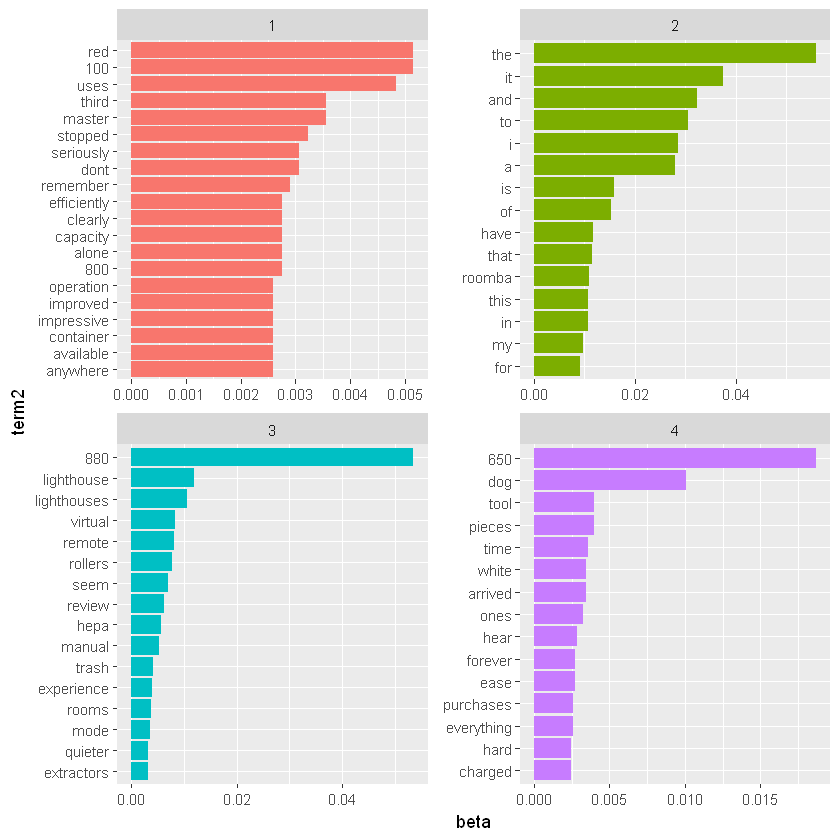

In [48]:
ggplot(
    word_probs,
aes(
    term2,
    beta,
    fill = as.factor(topic)
)
)+
    geom_col(show.legend = FALSE) +
    facet_wrap(~topic, scales = "free") +
    coord_flip()

We can see that each topic splits it into different types of catergories. Topic 3 looks like functionality while  topic 4 looks like experiences.